# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `KNN Classifiers`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed 
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q1.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Padala Sudheer Reddy
Roll Number: 2020101065

### Dataset

Use the code below to load the Dataset

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
#Load data
iris = pd.read_csv('Iris.csv')
#data cleaning
iris.drop(columns="Id",inplace=True)

In [9]:
#features and labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Write your Code below for KNN Classifier.<br>
Use different values of K and test the accuracies.

In [10]:
thisdict = {
  "Iris-virginica": 0,
  "Iris-versicolor": 1,
  "Iris-setosa": 2
}

In [11]:
epochs = 500
Accuracies = np.zeros((epochs,len(X_train)))
maxk = len(X_train)
for itr in range(epochs):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=itr)
    trpts = len(X_train)
    tespts = len(X_test)
    dist = np.zeros((tespts, trpts))
    sortcls = np.zeros((tespts, trpts))
    finmatrix = np.zeros((tespts, trpts))
    for i in range(tespts):
        for j in range(trpts):
            dist[i][j] = (((X_test[i][0] - X_train[j][0])**2) + ((X_test[i][1] - X_train[j][1])**2) + ((X_test[i][2] - X_train[j][2])**2) + ((X_test[i][3] - X_train[j][3])**2))/4
        classes = np.argsort(dist[i])
        for j in range(trpts):
            sortcls[i][j] = thisdict[y_train[classes[j]]]
        freq = np.zeros(trpts)
        maxi = 0
        ind = 0
        for j in range(trpts):
            freq[int(sortcls[i][j])] += 1
            if(maxi < freq[int(sortcls[i][j])]):
                maxi = freq[int(sortcls[i][j])]
                ind = int(sortcls[i][j])
            finmatrix[i][j] = ind
    for k in range(maxk):
        count=0
        for i in range(tespts):
            if(int(finmatrix[i][k] == int(thisdict[y_test[i]]))):
                count+=1
        Accuracies[itr][k] = count*100/tespts

k = 1 , Accuracy = 95.77333333333328
k = 2 , Accuracy = 95.77333333333328
k = 3 , Accuracy = 96.1066666666666
k = 4 , Accuracy = 96.1066666666666
k = 5 , Accuracy = 96.22666666666662
k = 6 , Accuracy = 96.22666666666662
k = 7 , Accuracy = 96.42666666666666
k = 8 , Accuracy = 96.42666666666666
k = 9 , Accuracy = 96.4999999999999
k = 10 , Accuracy = 96.4999999999999
k = 11 , Accuracy = 96.55999999999996
k = 12 , Accuracy = 96.55999999999996
k = 13 , Accuracy = 96.73333333333319
k = 14 , Accuracy = 96.73333333333319
k = 15 , Accuracy = 96.61333333333327
k = 16 , Accuracy = 96.61333333333327
k = 17 , Accuracy = 96.61999999999996
k = 18 , Accuracy = 96.61999999999996
k = 19 , Accuracy = 96.09999999999994
k = 20 , Accuracy = 96.09999999999994
k = 21 , Accuracy = 95.68666666666665
k = 22 , Accuracy = 95.68666666666665
k = 23 , Accuracy = 95.16666666666667
k = 24 , Accuracy = 95.16666666666667
k = 25 , Accuracy = 94.64666666666662
k = 26 , Accuracy = 94.64666666666662
k = 27 , Accuracy = 94.42

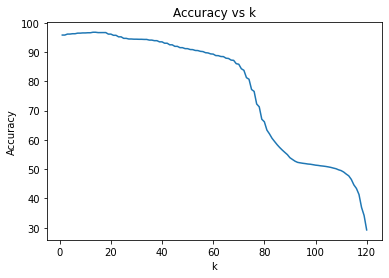

In [12]:
from matplotlib import pyplot as plt
acurk = Accuracies.mean(axis=0)
for i in range(maxk):
    print("k =",i+1,",","Accuracy =",acurk[i])
num = np.arange(1,maxk+1,1)
plt.plot(num,acurk)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()


### Questions

1) What are the Advantages and Disadvantages of KNN algorithm?<br>
2) What is the complexity of the KNN algorithm during Training and Testing?<br> 
3) Is euclidian distance the only distance metric used in KNN? 
4) what K value gave the best accuracy?

# Q1
### Advantages
1. As there is no training in KNN algorithm,new data can be added at any point of time for testing
2. KNN is very easy to implement and intuitive to understand


### Disadvantages
1. The time complexity to predict the labels of the large data can be too large as it takes O($nlogn$) for every test point , where n is the no of train points
2. For assigning a label for a test point, we take k train points which has minimum distances from the test point. All these train points are given equal importance irrespective of thier distances 

# Q2

* The time complexity for training is O(1)
* As we have to find the best k, I computed the accuracies for every possible k. Let n be no of train data points and m be the no of test points. The time complexity taken for computing accuracies for all k is O($nm.log(n)$).

# Q3
- No we can use different kinds of distance metrics like Manhattan, Minkowski and Hamming distance.
- But euclidean distance is more effective as it gives the shortest distance

# Q4
- I trained the model for 500 epochs, where in each epoch the training data and test data are splitted differently to ensure that the model performs well on test data
- The best K obtained is 13.